In [1]:
"""Examine SVD of Radon transform."""

'Examine SVD of Radon transform.'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from common.radon import radon
from common.utils import rect_phantom

In [3]:
"""Create explicit Radon transform matrix."""

def create_radon_matrix(img_dims, scanner_properties):
    matrix_dims = (
        scanner_properties["views"] * scanner_properties["detector_count"],
        np.prod(img_dims),
    )

    # Set up Radon transform matrix
    radon_matrix = np.zeros(matrix_dims)

    for j in range(matrix_dims[1]):
        # Create a vectorised blank image with one white pixel equal to current column index
        img = np.zeros(matrix_dims[1])
        img[j] = 1

        # Reshape and perform Radon transform
        img = img.reshape(img_dims, order="F")
        sinogram = radon(img=img, **scanner_properties)
        radon_matrix[:, j] = sinogram.reshape(matrix_dims[0])

    return radon_matrix

In [4]:
"""Create Radon matrix for a small 32 x 32 image."""

scanner_properties = {
    "views": 32,
    "angle": 180,
    "detector_count": 32,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}
img_dims = (32, 32)
sino_dims = (scanner_properties["views"], scanner_properties["detector_count"])

radon_matrix = create_radon_matrix(img_dims, scanner_properties)

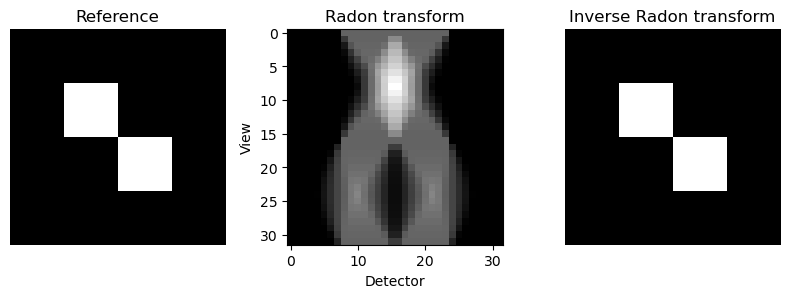

In [5]:
"""Test explicit Radon transform matrix on indicator function"""

f = rect_phantom(img_dims, phantom_dims=(16, 16))
g = np.reshape(radon_matrix @ f.ravel(), sino_dims)

# Get SVD of Radon transform
U, W, Vt = np.linalg.svd(radon_matrix, full_matrices=False)
Winv = np.linalg.inv(np.diag(W))

# Perform inverse Radon transform using SVD
f_hat = (Vt.T @ Winv @ U.T @ g.ravel()).reshape(img_dims)

plt.figure(figsize=(8, 6))
plt.subplot(1, 3, 1)
plt.imshow(f, cmap="gray")
plt.title("Reference")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(g, cmap="gray")
plt.title("Radon transform")
plt.xlabel("Detector")
plt.ylabel("View")
plt.subplot(1, 3, 3)
plt.imshow(f_hat, cmap="gray")
plt.axis("off")
plt.title("Inverse Radon transform")
plt.tight_layout()
plt.show()

In [6]:
"""Create a small Radon matrix for visualising SVD."""

scanner_properties = {
    "views": 8,
    "angle": 180,
    "detector_count": 8,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}
img_dims = (8, 8)
sino_dims = (scanner_properties["views"], scanner_properties["detector_count"])

radon_matrix = create_radon_matrix(img_dims, scanner_properties)
U, W, Vt = np.linalg.svd(radon_matrix, full_matrices=False)

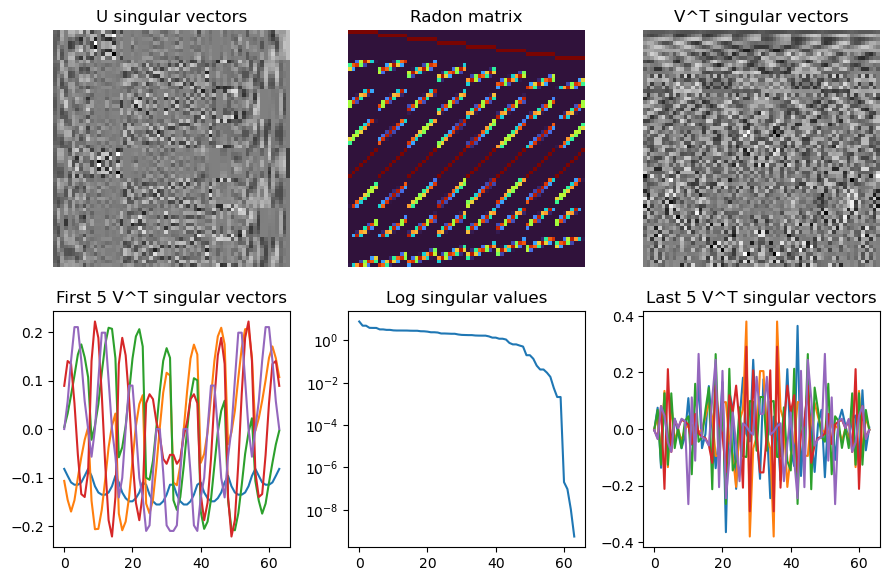

In [7]:
"""Visualise Radon transform matrix SVD."""

fig = plt.figure(figsize=(9, 6))
plt.subplot(2, 3, 1)
plt.imshow(U, cmap="gray")
plt.title("U singular vectors")
plt.axis("off")
plt.subplot(2, 3, 2)
plt.imshow(radon_matrix, cmap="turbo")
plt.title("Radon matrix")
plt.axis("off")
plt.subplot(2, 3, 3)
plt.imshow(Vt, cmap="gray")
plt.title("V^T singular vectors")
plt.axis("off")

plt.subplot(2, 3, 4)
for i in range(5):
    plt.plot(Vt[i, :])
plt.gca().set_box_aspect(1)
plt.title("First 5 V^T singular vectors")

plt.subplot(2, 3, 5)
plt.semilogy(W.flatten())
plt.title("Log singular values")
plt.gca().set_box_aspect(1)

plt.subplot(2, 3, 6)
for i in range(Vt.shape[0] - 5, Vt.shape[0]):
    plt.plot(Vt[i, :])
plt.gca().set_box_aspect(1)
plt.title("Last 5 V^T singular vectors")

plt.tight_layout()
plt.show()

In [8]:
"""Determine how singular values change with number of views"""

scanner_properties = {
    "angle": 180,
    "detector_count": 64,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}
img_dims = (64, 64)

views = [15, 30, 45, 60, 90, 135, 180]
view_sing_vals = []

for idx, view in enumerate(views):
    # Update scanner properties
    scanner_properties["views"] = view
    sino_dims = (scanner_properties["views"], scanner_properties["detector_count"])

    # Get Radon matrix and SVD
    radon_matrix = create_radon_matrix(img_dims, scanner_properties)
    _, W, _ = np.linalg.svd(radon_matrix)
    view_sing_vals.append(W)

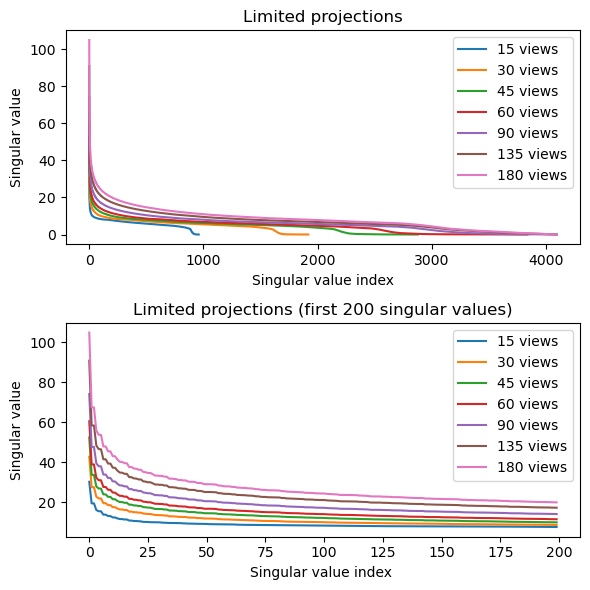

In [9]:
"""Visualise singular values for different numbers of views"""

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
for idx in range(len(views)):
    plt.plot(view_sing_vals[idx], label=f"{views[idx]} views")
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Limited projections")
plt.legend()

plt.subplot(2, 1, 2)
for idx in range(len(views)):
    plt.plot(view_sing_vals[idx][0:200], label=f"{views[idx]} views")
plt.xlabel("Singular value index ")
plt.ylabel("Singular value")
plt.title("Limited projections (first 200 singular values)")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
"""Determine how singular values change with maximum angle"""

scanner_properties = {
    "views": 180,
    "detector_count": 64,
    "detector_spacing": 1,
    "beam_geometry": "parallel",
}
img_dims = (64, 64)

angles = [15, 30, 45, 60, 90, 135, 180]
angle_sing_vals = []

for idx, angle in enumerate(angles):
    # Update scanner properties
    scanner_properties["angle"] = angle
    sino_dims = (scanner_properties["views"], scanner_properties["detector_count"])

    # Get Radon matrix and SVD
    radon_matrix = create_radon_matrix(img_dims, scanner_properties)
    _, W, _ = np.linalg.svd(radon_matrix)
    angle_sing_vals.append(W)

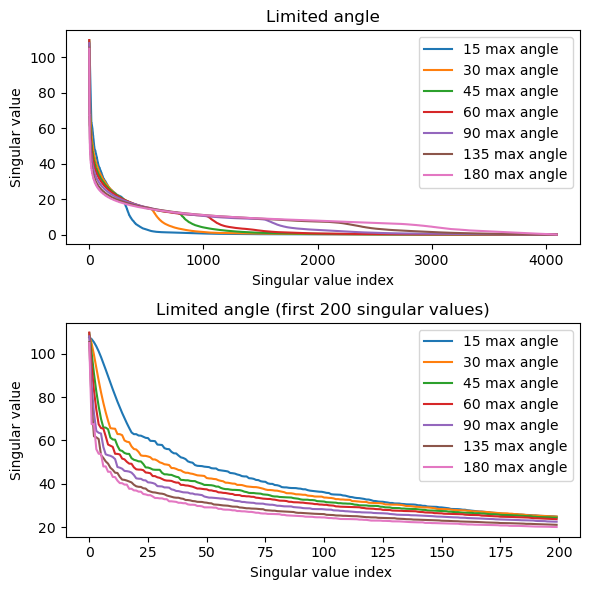

In [11]:
"""Visualise singular values for different maximum angles"""

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
for idx in range(len(views)):
    plt.plot(angle_sing_vals[idx], label=f"{views[idx]} max angle")
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Limited angle")
plt.legend()

plt.subplot(2, 1, 2)
for idx in range(len(views)):
    plt.plot(angle_sing_vals[idx][0:200], label=f"{views[idx]} max angle")
plt.xlabel("Singular value index ")
plt.ylabel("Singular value")
plt.title("Limited angle (first 200 singular values)")
plt.legend()

plt.tight_layout()
plt.show()

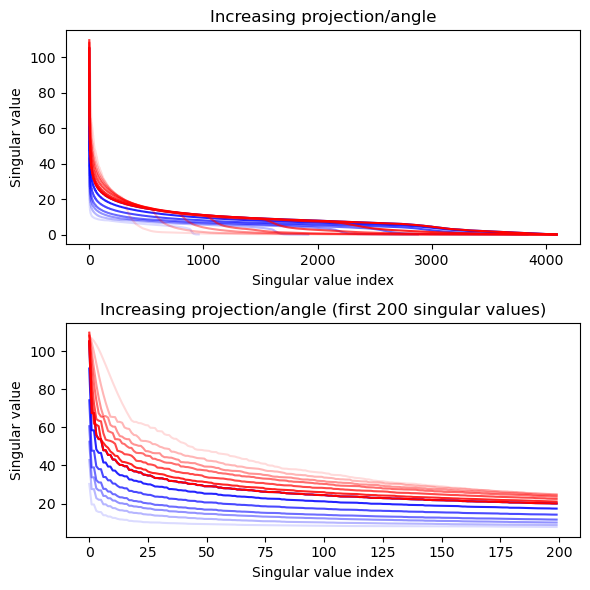

In [12]:
"""Visualise singular values for both limited projections and angles:
increasing projections and angles - increasing opacity."""

plt.figure(figsize=(6, 6))
plt.subplot(2, 1, 1)
for idx in range(len(views)):
    plt.plot(view_sing_vals[idx], c="b", alpha=(idx + 1) / len(views))
for idx in range(len(angles)):
    plt.plot(angle_sing_vals[idx], c="r", alpha=(idx + 1) / len(angles))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Increasing projection/angle")

plt.subplot(2, 1, 2)
for idx in range(len(views)):
    plt.plot(view_sing_vals[idx][0:200], c="b", alpha=(idx + 1) / len(views))
for idx in range(len(angles)):
    plt.plot(angle_sing_vals[idx][0:200], c="r", alpha=(idx + 1) / len(angles))
plt.xlabel("Singular value index")
plt.ylabel("Singular value")
plt.title("Increasing projection/angle (first 200 singular values)")

plt.tight_layout()
plt.show()